In [45]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import prince
import importlib

import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from networkx.algorithms import bipartite


import community as community_louvain
from netgraph import Graph

import sys
sys.path.insert(0, '../Utility files')
import corg
from corg import DiscoverDimension
import seaborn as sn
from corg import BenchmarkDimension
from corg import DiscoverDimension


import utils2
from utils2 import *
import graphfunk
from graphfunk import *

import ca_pipeline
from ca_pipeline import *


See this link for setting up the facebook marketing API code:
- https://github.com/carolcoimbra/facebook-ads/blob/master/example.ipynb 

# What Markers to Include?

In this notebook, I'll try to identify what markers that make sense to include in our analysis. 
- We identify the dimension that is best at classifying/separating markers of clear difference in SES.
- We do this via the CORG method for different CA fits (varying the network to include or leave out certain markers)
- The CORG methodology might be problematic since we don't have a good span of data variables in high and low categories

### Load data

- The data loaded here contains a row for each follower relationship a brand has. It includes the original type column, as well as the changed column (condensed from 12 to 4 types.)
- Additionally, it has been filtered to only include markers with more than 100 followers

In [3]:
# load data
path = '/home/livtollanes/NewData/french/french_edgelist_marker_threshold.csv'

req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2']
dtypes = {'marker_id': 'object',
          'follower_id': 'object',
          'twitter_name': 'object',
          'followers': 'int64',
          'french_followers': 'int64',
          'type': 'object',
          'type2': 'object'}


edgelist_CORG = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

In [4]:
edgelist_CORG.head()

,marker_id,follower_id,twitter_name,type,followers,french_followers,type2
0,19976004,1193293102162862080,Mediapart,media,3079643,64182,information
1,19976004,2884619299,Mediapart,media,3079643,64182,information
2,19976004,782999494703054848,Mediapart,media,3079643,64182,information
3,19976004,124458686,Mediapart,media,3079643,64182,information
4,19976004,2960220189,Mediapart,media,3079643,64182,information


In [17]:
# load data
path = '/home/livtollanes/10.jan-thesis/labeldata/filled_labels_markers.csv'

req_cols = ['type', 'twitter_name', 'high', 'low', 'other']
dtypes = {'type': 'object',
          'twitter_name': 'object',
          'high': 'object',
          'low': 'object',
          'other': 'object'}

labels_hl = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

### Create an empty csv file to fill in manualy (High vs. Low SES)

In [ ]:
# #Separate my data frame into dictionary of types
# def create_dict(df, key_col, value_col):
#     unique_df = df.drop_duplicates(subset=[key_col, value_col])
#     return unique_df.groupby(key_col)[value_col].apply(list).to_dict()


# df_dict = create_dict(edgelist_CORG, 'type', 'twitter_name')
# df_dict2 = create_dict(edgelist_CORG, 'type2', 'twitter_name')


# for key, value in df_dict.items():
#     value = list(set(value))
#     print(f"Key: {key}")
#     print(f"Value: {value}\n")



# # Create a csv file to use for labeling 
# rows = []
# for key, values in df_dict.items():
#     for value in values:
#         row = {'type': key, 'twitter_name': value, 'high': '', 'low': ''}
#         rows.append(row)

# # Now we write the rows to a CSV file
# keys = ['type', 'twitter_name', 'high', 'low']

# with open('/home/livtollanes/10.jan-thesis/labeldata/labeled_markers_empty.csv', 'w', newline='') as output_file:
#     dict_writer = csv.DictWriter(output_file, keys)
#     dict_writer.writeheader()
#     dict_writer.writerows(rows)

Now, reformat the filled in label df

In [26]:
# Create the labeled marker df to input to the CORG method

# Create a copy of labels_hl
labels_CORG = labels_hl.copy()

# Create 'SES' column
labels_CORG['SES'] = np.where(labels_CORG['high'] == '1', '1', 
                              np.where(labels_CORG['low'] == '1', '0', 'drop'))

# Drop the rows where 'SES' is 'drop'
labels_CORG = labels_CORG[labels_CORG['SES'] != 'drop']

# Keep only 'twitter_name' and 'SES' columns
labels_CORG = labels_CORG[['twitter_name', 'SES']]

### CA class implementation

In [7]:
# load data
path = '/home/livtollanes/NewData/french/french_edgelist_marker_threshold.csv'

req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2']
dtypes = {'marker_id': 'object',
          'follower_id': 'object',
          'twitter_name': 'object',
          'followers': 'int64',
          'french_followers': 'int64',
          'type': 'object',
          'type2': 'object'}


all = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

In [44]:

# Assuming you have a DataFrame `df` and a subset name `subset_name`
subset_name = "all"

# Create an instance of the class
m1 = ca_pipeline.CorrAnPipeline(all, subset_name)



AttributeError: module 'ca_pipeline' has no attribute 'CorrAnPipeline'

Number of nodes: 115302
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 115302


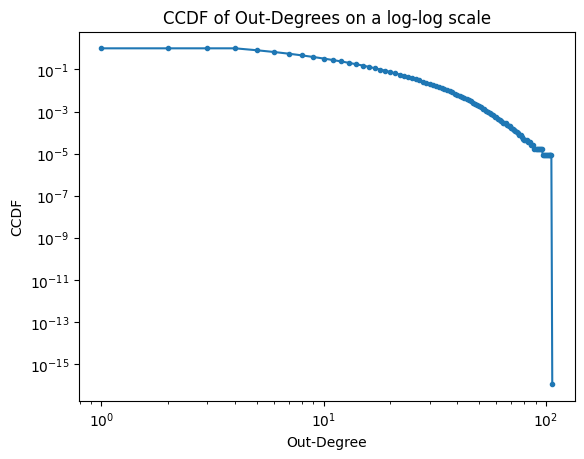

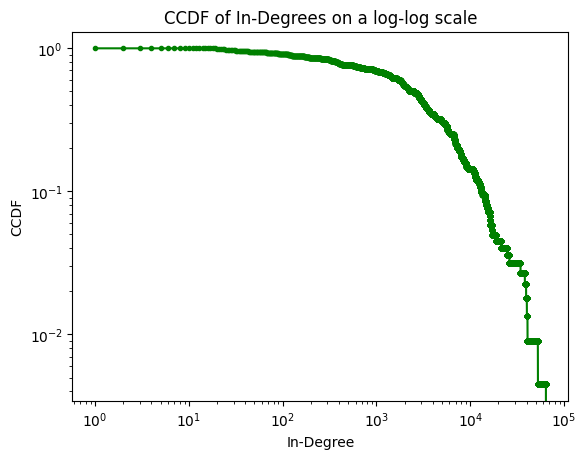

KeyboardInterrupt: 

In [36]:
# Call the run_all method
path_m1 = '/home/livtollanes/NewData'
m1.run_all(path_m1)

## CORG for assessing models

In [29]:
import corg
from corg import DiscoverDimension
import seaborn as sn
from corg import BenchmarkDimension
from corg import DiscoverDimension
